<a href="https://colab.research.google.com/github/1smiley43/Project-2/blob/main/Project_2_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

#Dataset

In [3]:
## Loading data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo files/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Source of data:

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Description of data:

This data houses information on individuals and their income bracket, at either below $50K or equal/above $50K.

The Target:

The target is to predict if a person's 
income will earn below or above $50K.

The Rows:

Each row represents one person in this dataset.

Regression or Classification:

Since there are only two options for the result, this is a classification problem.

In [4]:
df.shape

(48842, 15)

Features and Rows:

This dataset has 48842 rows and 15 features.



Possible Challenges:

There are values of "?" that will need to be addressed. There are many values that will need to be OneHotEncoded.

#Cleaning the Data

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df.describe(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


workclass, fnlwgt, educational-num, marital-status, relationship, and native-country columns won't be necessary for calculations so I'll remove them.

In [20]:
df.drop(columns=['workclass', 'fnlwgt','educational-num','marital-status','relationship', 'native-country'], inplace = True)

Missing values are denoted with a "?" in this dataset. To help with visualization, I'm going to replace their values with "Unknown". Changing it to the most frequent or other existing value would skew the data more than I'd like.

In [18]:
#Replacing all instances of "?" with "Unknown" to better label missing values.
df = df.replace({'?': 'Unknown'})

In [21]:
df.head()

,age,education,occupation,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,11th,Machine-op-inspct,Black,Male,0,0,40,<=50K
1,38,HS-grad,Farming-fishing,White,Male,0,0,50,<=50K
2,28,Assoc-acdm,Protective-serv,White,Male,0,0,40,>50K
3,44,Some-college,Machine-op-inspct,Black,Male,7688,0,40,>50K
4,18,Some-college,Unknown,White,Female,0,0,30,<=50K


In [26]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [25]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [24]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [23]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [22]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

I don't feel like education lower than high school really need unique values so I'm going to group those all into one.

In [27]:
#Replacing education values less than High School Graduate with 'No Diploma'
df['education'] = df['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th', '12th'],'No Diploma')


In [28]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
No Diploma       6408
Masters          2657
Assoc-voc        2061
Assoc-acdm       1601
Prof-school       834
Doctorate         594
Name: education, dtype: int64

In [29]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


Though there are some unusual 

Text(0.5, 1.0, 'Distribution by Occupation')

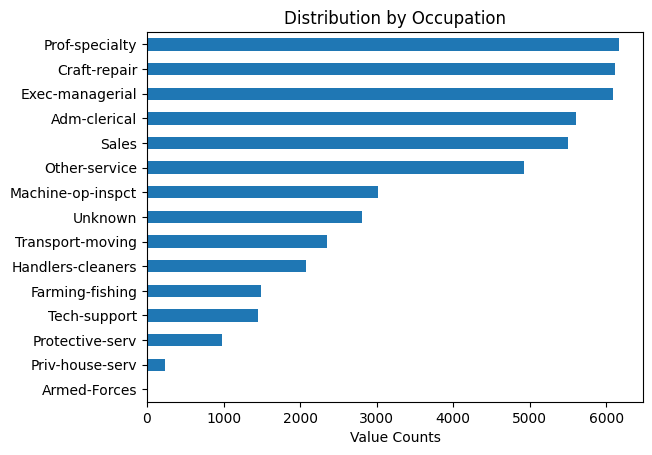

In [45]:
hpw_value_counts = df['occupation'].value_counts(dropna= False).sort_values()
ax = hpw_value_counts.plot(kind = 'barh')
ax.set_xlabel('Value Counts');
ax.set_title('Distribution by Occupation')

Text(0.5, 1.0, 'Distribution by Education Level')

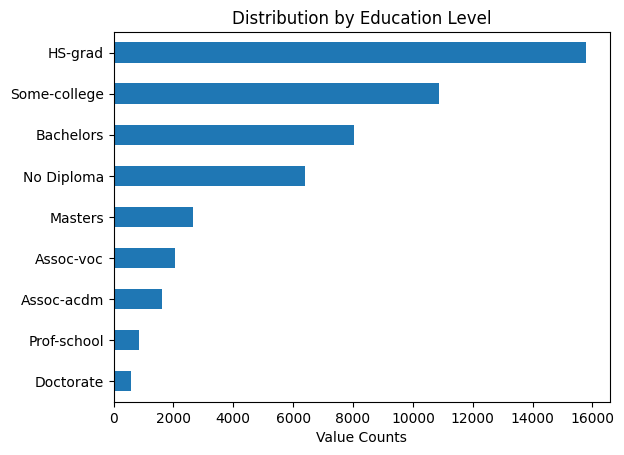

In [46]:
hpw_value_counts = df['education'].value_counts(dropna= False).sort_values()
ax = hpw_value_counts.plot(kind = 'barh')
ax.set_xlabel('Value Counts');
ax.set_title('Distribution by Education Level')

Text(0.5, 1.0, 'Income by Hours per week grouped by Gender')

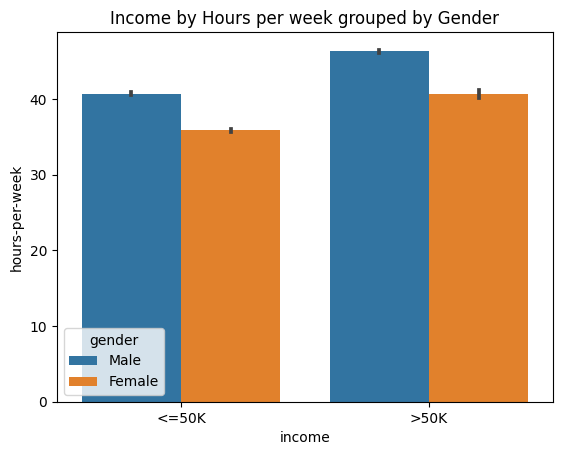

In [34]:
ax = sns.barplot(data = df, x = 'income', y = 'hours-per-week', hue = 'gender')
ax.set_title('Income by Hours per week grouped by Gender')